train/PNEUMONIA
3904
3904
(3904, 192, 192, 3) (3904,)
[[[[0.5568628  0.5568628  0.5568628 ]
   [0.5529412  0.5529412  0.5529412 ]
   [0.5803922  0.5803922  0.5803922 ]
   ...
   [0.16078432 0.16078432 0.16078432]
   [1.         1.         1.        ]
   [0.16078432 0.16078432 0.16078432]]

  [[0.57254905 0.57254905 0.57254905]
   [0.56078434 0.56078434 0.56078434]
   [0.57254905 0.57254905 0.57254905]
   ...
   [0.02352941 0.02352941 0.02352941]
   [0.2        0.2        0.2       ]
   [0.11764706 0.11764706 0.11764706]]

  [[0.56078434 0.56078434 0.56078434]
   [0.56078434 0.56078434 0.56078434]
   [0.5882353  0.5882353  0.5882353 ]
   ...
   [0.26666668 0.26666668 0.26666668]
   [0.21176471 0.21176471 0.21176471]
   [0.15686275 0.15686275 0.15686275]]

  ...

  [[0.00392157 0.00392157 0.00392157]
   [0.00392157 0.00392157 0.00392157]
   [0.02352941 0.02352941 0.02352941]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.   

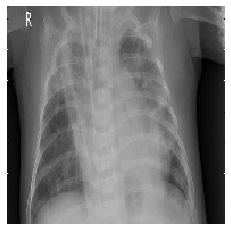

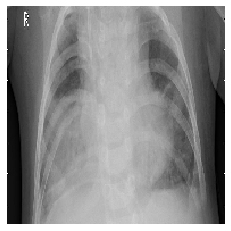

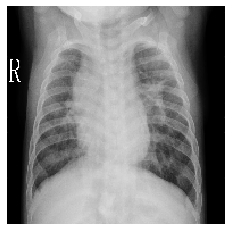

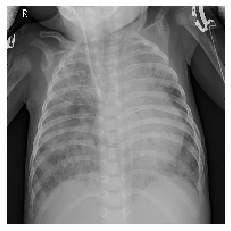

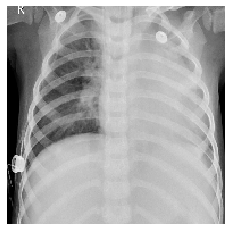

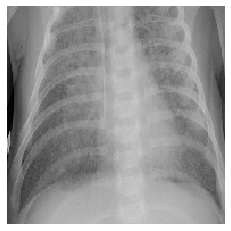

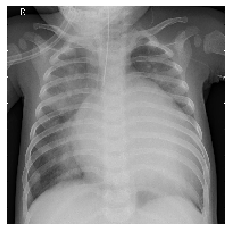

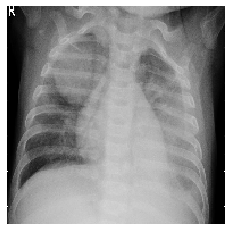

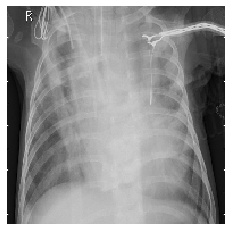

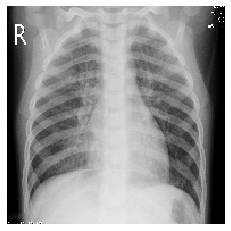

(3904, 110592)
(3904,)


In [73]:
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("train/PNEUMONIA")
print(p)
count = 0
count2 = 0
image_data = []
labels = []
for img_path in p.glob("*virus*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data.append(img_array) #Append the numerical representation of the image to an array
    labels.append(1)#The label list appends the label of that particular instance
    count = count +1
for img_path in p.glob("*bacteria*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data.append(img_array) #Append the numerical representation of the image to an array
    labels.append(0)#The label list appends the label of that particular instance
    count2 = count2 +1
print(len(labels))
print(len(image_data))

#convert data to numpy array 
image_data = np.array(image_data, dtype='float32')/255.0 #Why do we need this? 
labels = np.array(labels)
#192*192 is the size
print(image_data.shape, labels.shape) #This means it is a four dimensional?
print(image_data[1:20]) #prints each example as a numeric 192*192 image - I seriously do not understand the output of the 
#image data. 
## Randomly shuffle data

import random 
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

## Visualize the data
def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return
for i in range(10):
    drawImg(image_data[i])
image_data = image_data.reshape(image_data.shape[0],-1)
print(image_data.shape)
print(labels.shape)

In [74]:
from sklearn import svm
# Train SVM and get train accuracy 

svm_classifier = svm.SVC(kernel='linear', C=1.0) #learning rate =1 
svm_classifier.fit(image_data, labels)
ypred_sklearn = svm_classifier.predict(image_data)
svm_classifier.score(image_data,labels)

0.7809938524590164

val/PNEUMONIA
9
9
(9, 192, 192, 3) (9,)
[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.02352941 0.02352941 0.02352941]
  [0.02352941 0.02352941 0.02352941]
  [0.02352941 0.02352941 0.02352941]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.02352941 0.02352941 0.02352941]
  [0.02352941 0.02352941 0.02352941]
  [0.02352941 0.02352941 0.02352941]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.02352941 0.02352941 0.02352941]
  [0.02352941 0.02352941 0.02352941]
  [0.02352941 0.02352941 0.02352941]]

 ...

 [[0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.1254902  0.1254902  0.1254902 ]
  [0.03921569 0.03921569 0.03921569]
  [0.03921569 0.03921569 0.03921569]]

 [[1.         1.         1.       

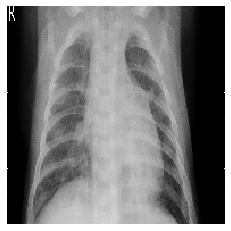

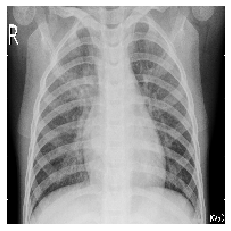

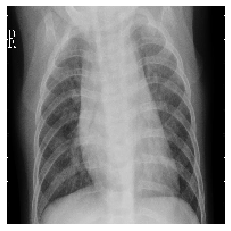

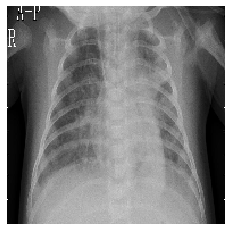

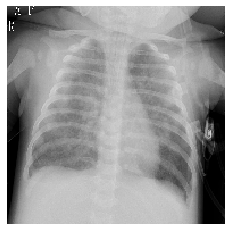

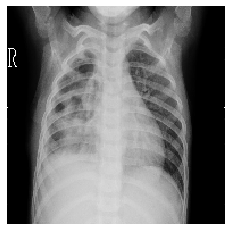

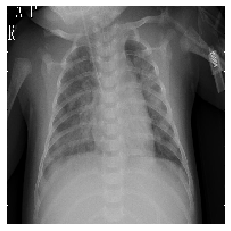

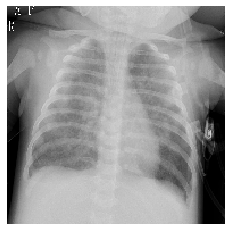

(9, 110592)
(9,)


In [75]:
p = Path("val/PNEUMONIA")
print(p)
count = 0
count2 = 0
image_data2 = []
labels2 = []
for img_path in p.glob("*virus*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data2.append(img_array) #Append the numerical representation of the image to an array
    labels2.append(1)#The label list appends the label of that particular instance
    count = count +1
for img_path in p.glob("*bacteria*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data2.append(img_array) #Append the numerical representation of the image to an array
    labels2.append(0)#The label list appends the label of that particular instance
    count2 = count2 +1
print(len(labels2))
print(len(image_data2))


#convert data to numpy array 
image_data2 = np.array(image_data2, dtype='float32')/255.0 #Why do we need this? 
labels2 = np.array(labels2)
#192*192 is the size
print(image_data2.shape, labels2.shape) #This means it is a four dimensional?
print(image_data2[4]) #prints each example as a numeric 192*192 image - I seriously do not understand the output of the 
#image data. 
## Randomly shuffle data

import random 
combined = list(zip(image_data2, labels2))
random.shuffle(combined)

image_data2[:], labels2[:] = zip(*combined)
## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(8):
    drawImg(image_data2[i])
## Data conversion for One vs One classification

M = image_data2.shape[0]
image_data2 = image_data2.reshape(M,-1)
print(image_data2.shape)
print(labels2.shape)


In [76]:
ypred_sklearn = svm_classifier.predict(image_data2)
svm_classifier.score(image_data2,labels2)

0.3333333333333333

test/PNEUMONIA
409
409
(409, 192, 192, 3) (409,)
[[[0.46666667 0.46666667 0.46666667]
  [0.46666667 0.46666667 0.46666667]
  [0.46666667 0.46666667 0.46666667]
  ...
  [0.         0.         0.        ]
  [0.5058824  0.5058824  0.5058824 ]
  [0.49411765 0.49411765 0.49411765]]

 [[0.46666667 0.46666667 0.46666667]
  [0.4862745  0.4862745  0.4862745 ]
  [0.48235294 0.48235294 0.48235294]
  ...
  [0.50980395 0.50980395 0.50980395]
  [0.44313726 0.44313726 0.44313726]
  [0.4627451  0.4627451  0.4627451 ]]

 [[0.48235294 0.48235294 0.48235294]
  [0.47843137 0.47843137 0.47843137]
  [0.4509804  0.4509804  0.4509804 ]
  ...
  [0.5019608  0.5019608  0.5019608 ]
  [0.47058824 0.47058824 0.47058824]
  [0.47058824 0.47058824 0.47058824]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         

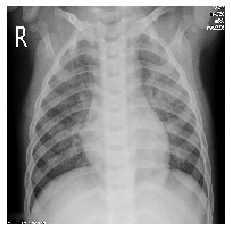

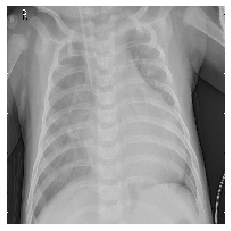

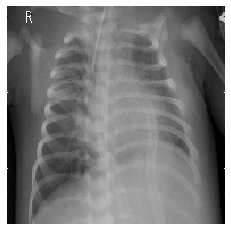

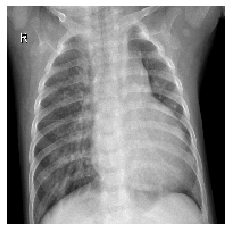

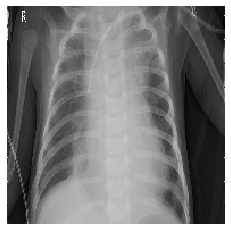

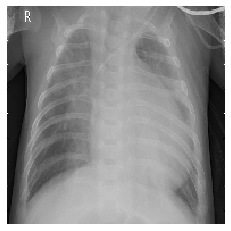

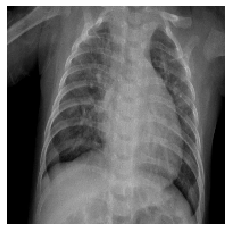

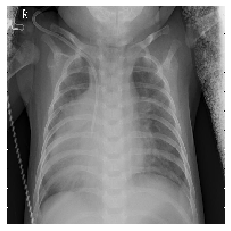

(409, 110592)
(409,)


In [77]:
p = Path("test/PNEUMONIA")
print(p)
image_data3 = []
labels3 = []
for img_path in p.glob("*virus*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data3.append(img_array) #Append the numerical representation of the image to an array
    labels3.append(1)#The label list appends the label of that particular instance
for img_path in p.glob("*bacteria*"): #For each image in the list of images: 
    img = image.load_img(img_path, target_size=(192,192))
    img_array = image.img_to_array(img) #Converts image into numerical values
    image_data3.append(img_array) #Append the numerical representation of the image to an array
    labels3.append(0)#The label list appends the label of that particular instance
print(len(labels3))
print(len(image_data3))


#convert data to numpy array 
image_data3 = np.array(image_data3, dtype='float32')/255.0 #Why do we need this? 
labels3 = np.array(labels3)
#192*192 is the size
print(image_data3.shape, labels3.shape) #This means it is a four dimensional?
print(image_data3[4]) #prints each example as a numeric 192*192 image - I seriously do not understand the output of the 
#image data. 

## Randomly shuffle data

import random 
combined = list(zip(image_data3, labels3))
random.shuffle(combined)

image_data3[:], labels3[:] = zip(*combined)
## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(8):
    drawImg(image_data3[i])
    
## Data conversion for One vs One classification

M = image_data3.shape[0]
image_data3 = image_data3.reshape(M,-1)
print(image_data3.shape)
print(labels3.shape)




In [78]:
ypred_sklearn = svm_classifier.predict(image_data3)
svm_classifier.score(image_data3,labels3)

0.60880195599022